## Load the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data from txt file with pandas
data = pd.read_csv('case1Data.txt', sep=", ", engine='python')
X = data.drop('y', axis=1)
y = data['y']

X_new = pd.read_csv("case1Data_Xnew.txt", sep=", ", engine='python')

X.head()

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,x_91,x_92,x_93,x_94,x_95,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,NaN,NaN,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,NaN,...,-7.032047,6.319109,NaN,26.197445,-9.913837,H,H,I,K,J
1,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,NaN,-2.442164,10.303557,...,-13.437474,NaN,-12.880342,25.924603,-7.015803,K,H,J,G,G
2,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,12.057741,...,-12.291624,2.664209,-15.803518,24.293073,-14.795709,I,H,G,H,G
3,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,7.182760,...,-13.253436,5.004891,-13.879328,25.954304,-9.365574,NaN,H,K,K,G
4,25.400286,NaN,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,NaN,-7.341165,9.933879,...,NaN,5.101262,-16.938532,22.611184,-17.240003,G,H,H,K,H


# Display missing values

Bemærk at i træningsdata er der ingen missing i C2,C3,C4,C5. Men det er der i det nye data!

Text(0.5, 1.0, 'Missing values in new data')

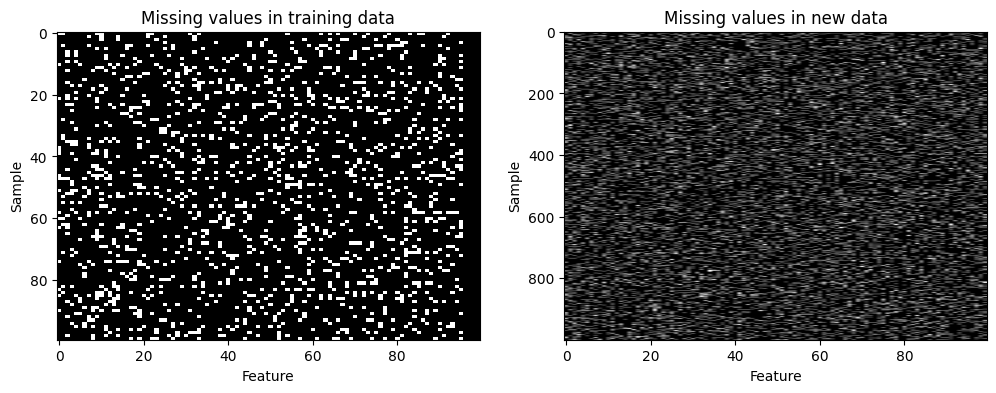

In [11]:
missing_vals_X = X.isna()
missing_vals_X_new = X_new.isna()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#plot missing values
ax[0].imshow(missing_vals_X, cmap='grey', aspect='auto')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Sample')
ax[0].set_title('Missing values in training data')

ax[1].imshow(missing_vals_X_new, cmap='grey', aspect='auto')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('Sample')
ax[1].set_title('Missing values in new data')

#print(missing_vals_X.sum())

In [12]:
print('C1', np.unique(X['C_ 1'].dropna().values))
print('C2',np.unique(X['C_ 2'].dropna().values))
print('C3',np.unique(X['C_ 3'].dropna().values))
print('C4',np.unique(X['C_ 4'].dropna().values))
print('C5',np.unique(X['C_ 5'].dropna().values))

print('C1 new data',np.unique(X_new['C_ 1'].dropna().values))
print('C2 new data',np.unique(X_new['C_ 2'].dropna().values))
print('C3 new data',np.unique(X_new['C_ 3'].dropna().values))
print('C4 new data',np.unique(X_new['C_ 4'].dropna().values))
print('C5 new data',np.unique(X_new['C_ 5'].dropna().values))


C1 ['G' 'H' 'I' 'J' 'K']
C2 ['H']
C3 ['G' 'H' 'I' 'J' 'K']
C4 ['G' 'H' 'I' 'J' 'K']
C5 ['G' 'H' 'I' 'J' 'K']
C1 new data ['G' 'H' 'I' 'J' 'K']
C2 new data ['H']
C3 new data ['G' 'H' 'I' 'J' 'K']
C4 new data ['G' 'H' 'I' 'J' 'K']
C5 new data ['G' 'H' 'I' 'J' 'K']


**C_2 er 'H' i alle vores samples, så den kan vi godt droppe**

In [13]:
X = X.drop('C_ 2', axis = 1)
X_new = X_new.drop('C_ 2', axis = 1)

In [14]:
#Make categorical data into one-hot encoding in X and in X_new

X = pd.get_dummies(X, dummy_na = True)
X_new = pd.get_dummies(X_new, dummy_na = True)
nan_cols = ['C_ 1_nan', 'C_ 3_nan', 'C_ 4_nan', 'C_ 5_nan']

for i in range(len(X)):
    for na_col in nan_cols:
        if X[na_col][i] == True:
            idx = X.columns.get_loc(na_col)
            for k in range(1, 6):
                X.iloc[i, idx-k] = np.nan

for i in range(len(X_new)):
    for na_col in nan_cols:
        if X_new[na_col][i] == True:
            idx = X_new.columns.get_loc(na_col)
            for k in range(1, 6):
                X_new.iloc[i, idx-k] = np.nan

X = X.drop(nan_cols, axis = 1)
X_new = X_new.drop(nan_cols, axis = 1)

C:\Users\johau\AppData\Local\Temp\ipykernel_31908\3309108433.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.iloc[i, idx-k] = np.nan
C:\Users\johau\AppData\Local\Temp\ipykernel_31908\3309108433.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_new.iloc[i, idx-k] = np.nan


## Save the one-hot encoded dataframe

In [17]:
#X.to_csv('case1Data_one_hot.csv', index=False)
#X_new.to_csv('case1Data_Xnew_one_hot.csv', index=False)

## Load the one-hot encoded dataframe

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_G,C_ 4_H,C_ 4_I,C_ 4_J,C_ 4_K,C_ 5_G,C_ 5_H,C_ 5_I,C_ 5_J,C_ 5_K
0,NaN,NaN,-3.978178,-1.504027,-14.986790,0.651581,-37.878245,16.213807,-3.965437,NaN,...,False,False,False,False,True,False,False,False,True,False
1,26.204958,11.185962,-8.247602,-3.875866,-11.329702,2.637900,-39.617497,NaN,-2.442164,10.303557,...,True,False,False,False,False,True,False,False,False,False
2,18.560873,11.355342,-9.370161,-3.745315,-16.292421,-1.831774,-37.584605,14.411348,-2.376175,12.057741,...,False,True,False,False,False,True,False,False,False,False
3,31.896496,10.069040,-9.484426,-1.512786,-11.421909,-5.649180,-42.830037,18.403197,-7.791762,7.182760,...,False,False,False,False,True,True,False,False,False,False
4,25.400286,NaN,-3.600959,-2.615988,-15.455676,-4.950816,-39.932456,NaN,-7.341165,9.933879,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24.821083,14.377228,-7.899269,-5.531786,NaN,-3.732251,NaN,15.752089,NaN,13.040789,...,True,False,False,False,False,True,False,False,False,False
96,20.848176,9.238049,-11.921478,-6.374971,-18.648810,-3.019048,-41.358696,8.435083,-5.864114,6.372895,...,False,False,True,False,False,False,False,False,False,True
97,27.160523,10.134287,-10.920363,-3.231409,-18.474369,-2.431349,-38.280634,21.150995,-2.531643,12.875277,...,False,False,False,False,True,False,False,False,True,False
98,20.391153,10.180320,NaN,-5.296246,-17.612480,-6.472314,-38.292821,12.740686,NaN,4.037933,...,False,True,False,False,False,True,False,False,False,False


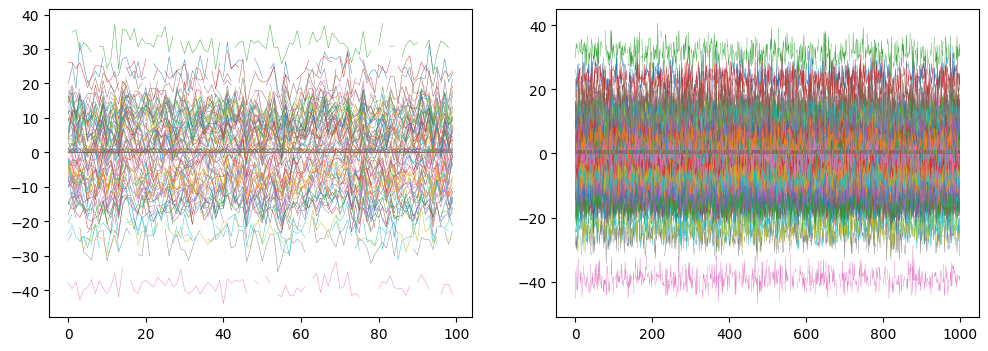

In [179]:
X = pd.read_csv('case1Data_one_hot.csv')
X_new = pd.read_csv('case1Data_Xnew_one_hot.csv')


#Plot to see the scale of the data and check for outliers
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for att in range(X.shape[1]):
#plot imputed values
    ax[0].plot(X.iloc[:,att], linewidth = 0.3)
    ax[1].plot(X_new.iloc[:,att], linewidth = 0.3)

X

### The scale in the data in very different, so before we do imputation, we will need to normalize the data

#### Lets investigate how that works with categorical values

In [187]:
from sklearn.preprocessing import StandardScaler

#scale the data
scaler1 = StandardScaler()
X_scaled = scaler1.fit_transform(X.iloc[:,:95])
X_scaled = np.concatenate((X_scaled, X.iloc[:,95:]), axis = 1)
scaler2 = StandardScaler()
Xnew_scaled = scaler2.fit_transform(X_new.iloc[:,:95])
Xnew_scaled = np.concatenate((Xnew_scaled, X_new.iloc[:,95:]), axis = 1)



#### A lot of missing values, we need some imputation!

In [188]:
from sklearn.impute import KNNImputer

#impute missing values with KNN
imputer = KNNImputer(n_neighbors=10, weights='uniform')
X_imputed = imputer.fit_transform(X_scaled)

#Define a function to transform the categorical values back to categorical values of booleans

def transform_to_categorical_bool(inp_array):
    N = inp_array.shape[0]
    for i in range(N):
        for j in range(4):
            idx = np.argmax(inp_array[i, 95+(j*5) : 95+(j+1)*5 ])
            inp_array[i, 95+(j*5) : 95+(j+1)*5 ] = 0,0,0,0,0
            inp_array[i, 95+(j*5) + idx] = 1
    return inp_array

X_imputed = transform_to_categorical_bool(X_imputed)



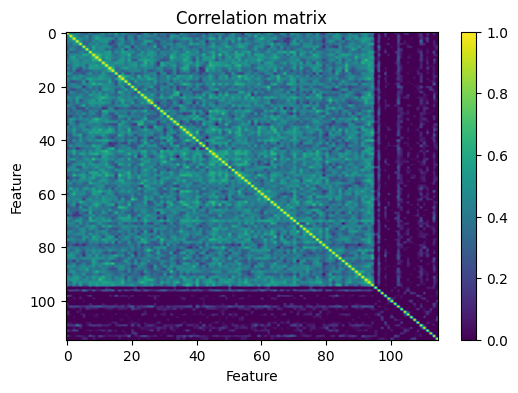

In [189]:
#plot the correlation matrix of the imputed data
fig, ax = plt.subplots(figsize=(6, 4))

#plot correlation matrix
ax.imshow(np.corrcoef(X_imputed.T), cmap='viridis', aspect='auto', vmin=0, vmax=1)
ax.set_xlabel('Feature')
ax.set_ylabel('Feature')
ax.set_title('Correlation matrix')
#add colorbar
cbar = plt.colorbar(ax.imshow(np.corrcoef(X_imputed.T), cmap='viridis', aspect='auto', vmin=0, vmax=1))

## Make a setup for imputation along with CV for a model

#### Idea: 

1. Split training data into 5 or 10 folds
2. Make CV loop:
    - Fit and transform Normalize-scaler based on training data and new data (Leaving the k'th fold out), call that data X_concat
    - Transform test data (The k'th fold)
    3. Make imputer-cv-loop (Choose hyperparameters in imputer):
        - Fit imputer on X_concat and transform
        - Transform the k'th fold with the imputer

        4. Loop over model-hyperparameters:
            - Fit model with hyperparameters on data X (training data without the k'th fold)
            - Predict on test data
            - Calculated and save MSE on test data

- Take mean over error-array in axis=0 (The CV-axis). 

- The idx that minimizes this will be our hyperparameters and the error at this idx will be our RMSE estimate of this particular model. (One-standard-deviation rule???)

- Lastly, fit model using all training data and the hyperparameters found above. This will be our predictions on the new data.

         

In [6]:
from sklearn.preprocessing import StandardScaler

X = pd.read_csv('case1Data_one_hot.csv').to_numpy()
X_new = pd.read_csv('case1Data_Xnew_one_hot.csv').to_numpy()
y_vec = y.values
print('y_vec shape:', y_vec.shape)

def transform_to_categorical_bool(inp_array):
    N = inp_array.shape[0]
    for i in range(N):
        for j in range(4):
            idx = np.argmax(inp_array[i, 95+(j*5) : 95+(j+1)*5 ])
            inp_array[i, 95+(j*5) : 95+(j+1)*5 ] = 0,0,0,0,0
            inp_array[i, 95+(j*5) + idx] = 1
    return inp_array

def custom_scale(scaler, data_X, data_Xnew):
    """ 
        Scale both X and Xnew based only on their continous values.
    """
    scaler.fit(np.concatenate((data_X[:,:95], data_Xnew[:,:95]), axis = 0))
    X_con, Xnew_con = scaler.transform(data_X[:,:95]), scaler.transform(data_Xnew[:,:95])
    data_X_norm = np.concatenate((X_con, data_X[:,95:]), axis = 1)
    data_Xnew_norm = np.concatenate((Xnew_con, data_Xnew[:,95:]), axis = 1)

    return scaler, data_X_norm, data_Xnew_norm

scaler, data_X_norm, data_Xnew_norm = custom_scale(StandardScaler(), X, X_new)

y_vec shape: (100,)


In [212]:
# Test setup on ridge-regresion (Only one hyper parameter)
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

K = 5
kf = KFold(n_splits=K)
alphas = np.linspace(10, 200, 20)
neighbors = range(10, 30, 2)
methods = ['uniform', 'distance']
errors = np.zeros((K, len(neighbors), len(methods), len(alphas)))

scaler_new = StandardScaler()
X_new_norm = np.concatenate((scaler_new.fit_transform(X_new[:, :95]), X_new[:,95:]), axis = 1) #Scaler fits on X_new (not ideal)

for k, (train_index, test_index) in enumerate(kf.split(X)):
    print(k)
    scaler = StandardScaler()
    Xtrain_norm = np.concatenate((scaler.fit_transform(X[train_index,:95]), X[train_index, 95:]), axis = 1) #Normalized training data
    Xtrain_norm_concat = np.concatenate((Xtrain_norm, X_new_norm), axis = 0)                                #Normalized training data concat with normalized new data

    Xtest = np.concatenate((scaler.transform(X[test_index, :95]), X[test_index, 95:]), axis = 1)
    ytrain, ytest = y_vec[train_index], y_vec[test_index]

    for i, n in enumerate(neighbors):
        for m, method in enumerate(methods):
            imputer = KNNImputer(n_neighbors=n, weights=method)
            Xtrain_concat_imputed = imputer.fit_transform(Xtrain_norm_concat)
            Xtrain_concat_imputed = transform_to_categorical_bool(Xtrain_concat_imputed)
            Xtest_imputed = imputer.transform(Xtest)
            Xtest_imputed = transform_to_categorical_bool(Xtest_imputed)

            for j, a in enumerate(alphas):
                model = Ridge(alpha=a).fit(Xtrain_concat_imputed[train_index], ytrain)
                preds = model.predict(Xtest_imputed)
                errors[k, i, m, j] = np.sum((preds - ytest)**2) #Sum up all squared error

mean_error = errors.mean(axis = 0)
idx = np.unravel_index(np.argmin(mean_error, axis=None), mean_error.shape)

print('Optimal neighbors: ', neighbors[idx[0]])
print('Optimal method:', methods[idx[1]])
print('optimal alpha: ', alphas[idx[2]])
print('Optimal RMSE', np.sqrt(mean_error[idx] / len(X)))

0
1
2
3
4
5
6
7
8
9
Optimal neighbors:  28
Optimal method: distance
optimal alpha:  150.0
Optimal RMSE 14.337516270111383


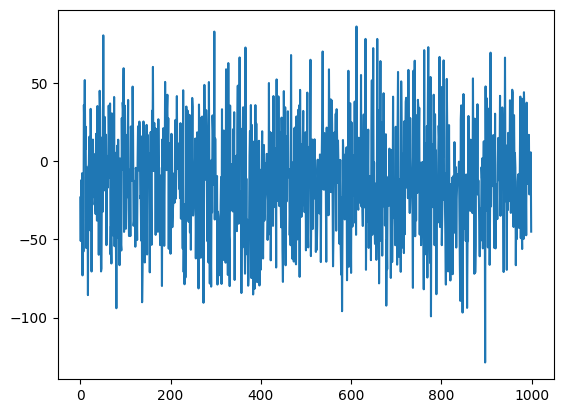

In [211]:
#Predict with optimal model:

scaler = StandardScaler()
X_new_tmp = scaler.fit_transform(X_new[:, :95]) #Scaler fits on X_new (not ideal)
X_new_concat = np.concatenate((X_new_tmp, X_new[:,95:]), axis = 1)

Xtrain = np.concatenate((scaler.transform(X[:,:95]), X[:, 95:]), axis = 1) #Normalized training data 

imputer = KNNImputer(n_neighbors=neighbors[idx[0]], weights=methods[idx[1]])
X_new_concat = imputer.fit_transform(X_new_concat)
Xtrain = imputer.transform(Xtrain)

model_opt = Ridge(alpha = alphas[idx[2]]).fit(Xtrain, y_vec)
opt_preds = model_opt.predict(X_new_concat)

plt.plot(opt_preds)

## Idea for KNN CV loop

In [332]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import copy

#impute missing values with KNN
methods = {"uniform": "uniform", "distance": "distance"}
neighbors = range(3,5, 1)
#K = len(X)
K = 5
CV = KFold(n_splits=K, shuffle=True, random_state=0)
n_Boots = 20
X_standardizer = StandardScaler()

deviance = np.zeros((K, len(neighbors), len(methods))) #Change this when we now what to do with the last 5 columns (Categorical data)

for k, (train_index, test_index) in enumerate(CV.split(X)):
    if (k+1) % 10 == 0:
        print('Fold ', k+1, ' of ', K)
    X_train = X.iloc[train_index, :]
    y_train = y[train_index]
    X_test = X.iloc[test_index, :]
    y_test = y[test_index]
    X_train_num = X_standardizer.fit_transform(X_train.iloc[:, :95])
    X_test_num = X_standardizer.transform(X_test.iloc[:,:95])
    X_train = np.concatenate((X_train_num, X_train.iloc[:,95:]), axis=1)
    X_test = np.concatenate((X_test_num, X_test.iloc[:,95:]), axis=1)

    for i, n in enumerate(neighbors):
        for j, method in enumerate(methods):
            imputer = KNNImputer(n_neighbors=n, weights=methods[method])
            X_train_imputed = imputer.fit_transform(X_train)
            rows, cols = X_test.shape
            c = 0
            tmp_error = 0
            while c<n_Boots:
                r, c = np.random.choice(rows-1, size = 1)[0], np.random.choice(cols-1, size = 1)[0]
                #mask = np.zeros_like(X_test)
                #mask[r,c] = 1
                if not np.isnan(X_test[r, c]):
                    #print(X_test[r,c])
                    c += 1
                    cop = copy.copy(X_test)
                    cop[r,c] = np.nan
                    tmp_imputed = imputer.fit_transform(cop)
                    tmp_error += (tmp_imputed[r,c] - X_test[r,c])**2
             
            deviance[k,i,j] = tmp_error

deviance = np.mean(deviance, axis=0)


In [313]:
deviance

array([[nan, nan],
       [nan, nan]])

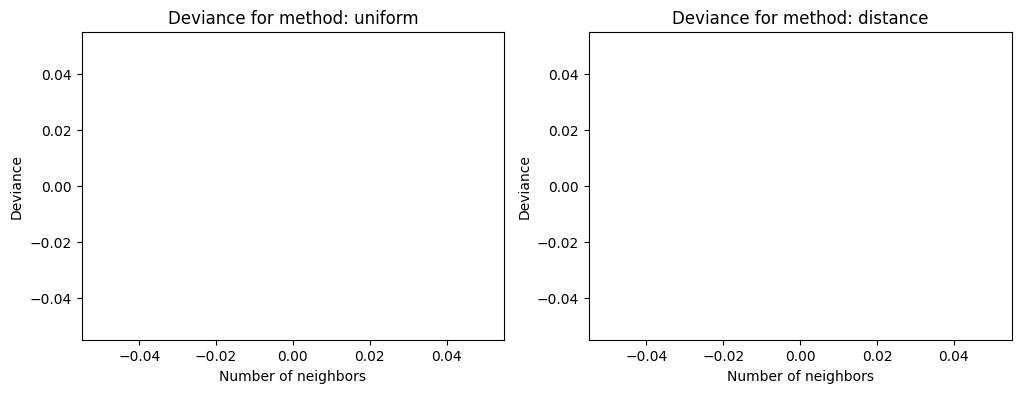

In [197]:
#plot the deviance
fig, ax = plt.subplots(1,2, figsize=(12, 4))

for i, (name, method) in enumerate(methods.items()):
    ax[i].plot(neighbors, deviance[:,i])
    ax[i].set_xlabel('Number of neighbors')
    ax[i].set_ylabel('Deviance')
    ax[i].set_title('Deviance for method: ' + name)